# Primera Parte -->  Off - line

1. Extracción de Datos
2. Inferir Fx Costo
3. Generar datos nuevos
4. Simunlar el modelo (varios tipos de lerners)
5. Evaluar los lerners
6. Obtener la comparación

In [1]:
import pandas as pd

### 1. Extracción de Datos

In [2]:
df_xgb=pd.read_csv('simdos.csv')
df_xgb.head()

,Unnamed: 0,user_id,af0,cycle,educ,gender,age,activity_id,af1,af2,dificulty,topic,prob,run_number
0,0,1,51,1,4,1,51,201,51,84,1,2,0.33,1
1,1,1,51,2,4,1,51,86,50,53,2,3,0.33,1
2,2,1,51,3,4,1,51,136,57,60,3,3,0.33,1
3,3,1,51,4,4,1,51,159,55,64,1,1,0.33,1
4,4,1,51,5,4,1,51,173,52,59,3,2,0.33,1


In [3]:
df_xgb.drop(columns=df_xgb.columns[0], axis=1, inplace=True)
df_xgb['cost'] =  df_xgb['af1'] - df_xgb['af2'] 
df_xgb.drop(columns=['af2','user_id','run_number','prob'], axis=1, inplace=True)


In [4]:
df_xgb['educ'].unique()

array([4, 2, 1, 5, 3], dtype=int64)

In [5]:
train_df_xgb = df_xgb[df_xgb.index < 70000]
test_df_xgb = df_xgb[df_xgb.index >= 70000]
test_df_xgb.reset_index

<bound method DataFrame.reset_index of        af0  cycle  educ  gender  age  activity_id  af1  dificulty  topic  cost
70000   48      1     5       0   45           42   52          2      3    -7
70001   48      2     5       0   45           20   49          3      2    -2
70002   48      3     5       0   45          144   49          4      3    -3
70003   48      4     5       0   45          167   48          5      3    -4
70004   48      5     5       0   45           37   46          5      3    -1
...    ...    ...   ...     ...  ...          ...  ...        ...    ...   ...
99995   50     16     4       0   38           57   52          5      2    -1
99996   50     17     4       0   38           76   47          4      2    -9
99997   50     18     4       0   38          240   54          5      3     4
99998   50     19     4       0   38          156   45          3      2   -12
99999   50     20     4       0   38          128   45          4      3    -9

[30000 rows 

### 2. Inferir Fx Costo
#### Modelo ML para determinar la Función de Costo

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def train_xgboost_regressor(train_data, train_labels, test_data, test_labels):
    # Define the XGBoost regressor
    reg = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        max_depth=4,
        learning_rate=0.18793869,
        gamma=0.03805912,
        min_child_weight=4.9259686,
        subsample=0.89705926,
        colsample_bytree=0.9011847,
        seed=42
    )

    # Train the XGBoost model
    reg.fit(train_data, train_labels)

    # Evaluate the model on the test data
    predictions = reg.predict(test_data)
    mse = mean_squared_error(test_labels, predictions)

    # Return the trained model and the mean squared error
    return reg, mse
     

In [8]:


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X_train=train_df_xgb.drop(columns=['cost','activity_id'], axis=1, inplace=False)
y_train=train_df_xgb['cost']

X_test=test_df_xgb.drop(columns=['cost', 'activity_id'], axis=1, inplace=False)
y_test=test_df_xgb['cost']


# Train an XGBoost regressor on the data
model, mse = train_xgboost_regressor(X_train, y_train, X_test, y_test)

# Print the MSE
print('MSE:', mse)
     

MSE: 52.585888564480264


In [9]:
X_train.head()

,af0,cycle,educ,gender,age,af1,dificulty,topic
0,51,1,4,1,51,51,1,2
1,51,2,4,1,51,50,2,3
2,51,3,4,1,51,57,3,3
3,51,4,4,1,51,55,1,1
4,51,5,4,1,51,52,3,2


In [10]:
def get_cost(af0, cycle, educ, gender, age, af1, dificulty, topic, model):
    
    usuario=pd.DataFrame({'af0':af0, 'cycle':cycle, 'educ':educ, 'gender':gender, 'age':age, 'af1':af1, 'dificulty':dificulty, 'topic':topic}, index=[1])
   
  
    
    costo=model.predict(usuario)
    
    return costo

### 3. Generar datos nuevos

In [29]:
df_vw=pd.read_csv('simdos.csv')
df_vw.head()

,Unnamed: 0,user_id,af0,cycle,educ,gender,age,activity_id,af1,af2,dificulty,topic,prob,run_number
0,0,1,51,1,4,1,51,201,51,84,1,2,0.33,1
1,1,1,51,2,4,1,51,86,50,53,2,3,0.33,1
2,2,1,51,3,4,1,51,136,57,60,3,3,0.33,1
3,3,1,51,4,4,1,51,159,55,64,1,1,0.33,1
4,4,1,51,5,4,1,51,173,52,59,3,2,0.33,1


In [30]:
df_vw.drop(columns=df_vw.columns[0], axis=1, inplace=True)
df_vw.drop(columns=['af2','run_number'], axis=1, inplace=True)

In [31]:
df_vw.head()

,user_id,af0,cycle,educ,gender,age,activity_id,af1,dificulty,topic,prob
0,1,51,1,4,1,51,201,51,1,2,0.33
1,1,51,2,4,1,51,86,50,2,3,0.33
2,1,51,3,4,1,51,136,57,3,3,0.33
3,1,51,4,4,1,51,159,55,1,1,0.33
4,1,51,5,4,1,51,173,52,3,2,0.33


### Esta función agrega una columna con el costo calculado para cada instancia

In [32]:
def colum_cost(df):
    
    cost=[]
    
    
    for i in range(len(df)):
        
        temp=df.iloc[i,[1,2,3,4,5,7,8,9]]
        usuario=pd.DataFrame(temp)
        usuario=usuario.transpose()
        #print(usuario)
        cost_cal= model.predict(usuario)
        cost.append(float(cost_cal))
        #print(cost)
        
        
    return cost
        

In [33]:
df_temp=colum_cost(df_vw)

In [34]:
df_vw['cost']=df_temp
df_vw.head()

,user_id,af0,cycle,educ,gender,age,activity_id,af1,dificulty,topic,prob,cost
0,1,51,1,4,1,51,201,51,1,2,0.33,-14.708818
1,1,51,2,4,1,51,86,50,2,3,0.33,-10.857389
2,1,51,3,4,1,51,136,57,3,3,0.33,-6.711127
3,1,51,4,4,1,51,159,55,1,1,0.33,-14.141218
4,1,51,5,4,1,51,173,52,3,2,0.33,-6.990316


In [35]:
train_df_vw = df_vw[df_vw.index >= 30001]
train_df_vw.reset_index
test_df_vw = df_vw[df_vw.index < 30000]
test_df_vw.reset_index

<bound method DataFrame.reset_index of        user_id  af0  cycle  educ  gender  age  activity_id  af1  dificulty  \
0            1   51      1     4       1   51          201   51          1   
1            1   51      2     4       1   51           86   50          2   
2            1   51      3     4       1   51          136   57          3   
3            1   51      4     4       1   51          159   55          1   
4            1   51      5     4       1   51          173   52          3   
...        ...  ...    ...   ...     ...  ...          ...  ...        ...   
29995     1500   42     16     2       0   36           26   44          5   
29996     1500   42     17     2       0   36           68   44          3   
29997     1500   42     18     2       0   36          144   40          1   
29998     1500   42     19     2       0   36           77   39          5   
29999     1500   42     20     2       0   36          111   41          5   

       topic  prob      

In [36]:
def convertir_a_vw(df, columnas_etiqueta, label=True):
    datos_vw = []
    for i, fila in df.iterrows():
        etiquetas = [str(fila[col]) for col in columnas_etiqueta]
        contexto = ' '.join([f'{val}' for col, val in fila.items() if col not in columnas_etiqueta])
        etiquetas_vw = ':'.join([f'{etiqueta}' for etiqueta in etiquetas])
        if label:
            datos_vw.append(f'{etiquetas_vw} | {contexto}')
        else:
            datos_vw.append(f'| {contexto}')

    return datos_vw

In [37]:
train_vw=convertir_a_vw(train_df_vw, ["dificulty", "cost","prob"])
train_vw[:5]

['2.0:-5.078622341156006:0.33 | 1501.0 75.0 2.0 5.0 1.0 60.0 210.0 75.0 2.0',
 '2.0:-4.857138633728027:0.33 | 1501.0 75.0 3.0 5.0 1.0 60.0 101.0 77.0 3.0',
 '3.0:-3.6275198459625244:0.33 | 1501.0 75.0 4.0 5.0 1.0 60.0 31.0 77.0 3.0',
 '2.0:-5.028799533843994:0.33 | 1501.0 75.0 5.0 5.0 1.0 60.0 150.0 78.0 1.0',
 '2.0:-5.040956974029541:0.33 | 1501.0 75.0 6.0 5.0 1.0 60.0 179.0 77.0 1.0']

In [39]:
test_vw=convertir_a_vw(test_df_vw, ["dificulty", "cost","prob"], False)
test_vw[:5]

['| 1.0 51.0 1.0 4.0 1.0 51.0 201.0 51.0 2.0',
 '| 1.0 51.0 2.0 4.0 1.0 51.0 86.0 50.0 3.0',
 '| 1.0 51.0 3.0 4.0 1.0 51.0 136.0 57.0 3.0',
 '| 1.0 51.0 4.0 4.0 1.0 51.0 159.0 55.0 1.0',
 '| 1.0 51.0 5.0 4.0 1.0 51.0 173.0 52.0 2.0']

In [92]:
prueba_vw=train_vw[:8000]

In [60]:
import random
import matplotlib.pyplot as plt
import vowpalwabbit
from vowpalwabbit import Workspace

In [90]:
def run_simulation(vw, num_iterations, do_learn):
    cost_sum = 0.0
    # das= costo acumulado promedio
    reward_rate = []
      
    for i in range(1, num_iterations + 1):
        for dato in prueba_vw:
            a=("|")
            b=dato.find(a)
            c=(b-6)
            d=dato[4:c]
            cost=float(d)
            cost_sum=+ cost
            if do_learn:
                vw_format=vw.parse(dato,vowpalwabbit.LabelType.CONTEXTUAL_BANDIT)
                vw.learn(vw_format)
                
                
                
                
        reward_rate.append(1 - cost_sum / i)
            
    
                  
    return reward_rate    
        

In [62]:
def plot_das(num_iterations, reward_rate):
    plt.plot(range(1, num_iterations + 1), reward_rate)
    plt.xlabel("num_iterations", fontsize=14)
    plt.ylabel("reward rate", fontsize=14)
 

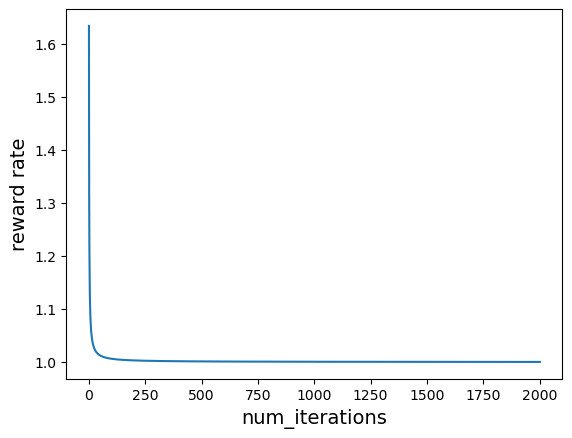

In [93]:
vw = vowpalwabbit.Workspace("--cb_explore 5", quiet=True)
num_iterations=2000
reward_rate = run_simulation(vw, num_iterations, do_learn=False)


plot_das(num_iterations, reward_rate)

In [94]:
vw = vowpalwabbit.Workspace("--cb_explore 5", quiet=True)
num_iterations=500
reward_rate = run_simulation(vw, num_iterations, do_learn=True)


plot_das(num_iterations, reward_rate)

MemoryError: 

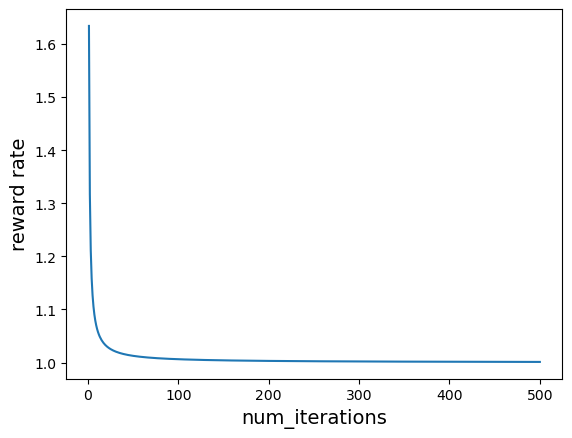

In [82]:
vw = vowpalwabbit.Workspace("--cb_explore 5 --quiet --first 1")
num_iterations=500
reward_rate = run_simulation(vw, num_iterations, do_learn=True)


plot_das(num_iterations, reward_rate)

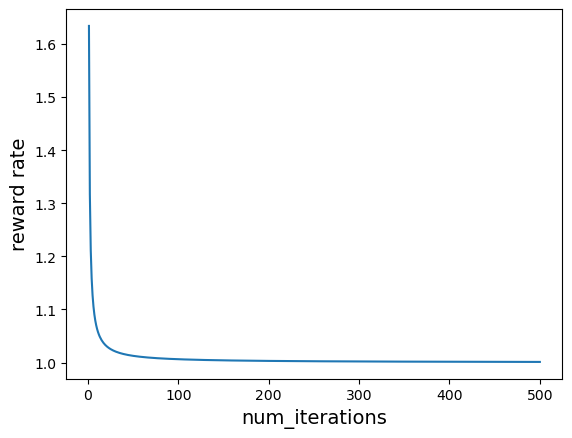

In [83]:
vw = vowpalwabbit.Workspace("--cb_explore 5 --quiet --first 2")
num_iterations=500
reward_rate = run_simulation(vw, num_iterations, do_learn=True)


plot_das(num_iterations, reward_rate)

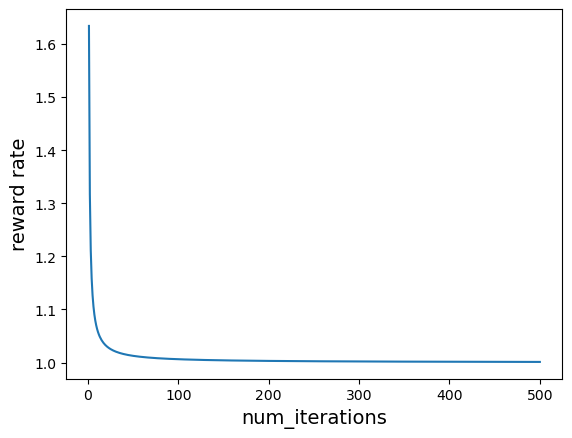

In [84]:
vw = vowpalwabbit.Workspace("--cb_explore 5 --quiet --first 3")
num_iterations=500
reward_rate = run_simulation(vw, num_iterations, do_learn=True)


plot_das(num_iterations, reward_rate)

In [85]:
vw = vowpalwabbit.Workspace("--cb_explore 5 --quiet --epsilon 0.1")
num_iterations=2000
reward_rate = run_simulation(vw, num_iterations, do_learn=True)


plot_das(num_iterations, reward_rate)

KeyboardInterrupt: 

In [ ]:
vw = vowpalwabbit.Workspace("--cb_explore 5 --quiet --epsilon 0.2")
num_iterations=2000
reward_rate = run_simulation(vw, num_iterations, do_learn=True)


plot_das(num_iterations, reward_rate)

In [ ]:
vw = vowpalwabbit.Workspace("--cb_explore 5 --quiet --bag 3")
num_iterations=2000
reward_rate = run_simulation(vw, num_iterations, do_learn=True)


plot_das(num_iterations, reward_rate)

In [ ]:
vw = vowpalwabbit.Workspace("--cb_explore 5 --quiet --bag 5")
num_iterations=2000
reward_rate = run_simulation(vw, num_iterations, do_learn=True)


plot_das(num_iterations, reward_rate)

In [ ]:
vw = vowpalwabbit.Workspace("--cb_explore 5 --quiet --cover 2")
num_iterations=2000
reward_rate = run_simulation(vw, num_iterations, do_learn=True)


plot_das(num_iterations, reward_rate)